In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

import zipfile
import os
import random

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D,Dropout
from keras.models import Model
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Unzip the data
local_zip = '/content/drive/MyDrive/Dataset/cell_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/cell-images-detecting-malaria')
zip_ref.close()

In [ ]:
parapath = '/content/cell-images-detecting-malaria/cell_images/Parasitized/'
uninpath = '/content/cell-images-detecting-malaria/cell_images/Uninfected/'
parastized = os.listdir(parapath)
uninfected = os.listdir(uninpath)

In [ ]:
data = []
label = []


for para in parastized:
    try:
      img =  image.load_img(parapath+para,target_size=(64,64))
      x = image.img_to_array(img)
      data.append(x)
      label.append(1)
    except:
        print("Can't add "+para+" in the dataset")

for unin in uninfected:
    try:
        img =  image.load_img(uninpath+unin,target_size=(64,64))
        x = image.img_to_array(img)
        data.append(x)
        label.append(0)
    except:
        print("Can't add "+unin+" in the dataset")


Can't add Thumbs.db in the dataset
Can't add Thumbs.db in the dataset


In [ ]:
data = np.array(data)/225
label = np.array(label)

In [ ]:
print(data.shape)

(27558, 64, 64, 3)


In [ ]:
print(label.shape)

(27558,)


In [ ]:

np.save("/content/drive/MyDrive/malaria_image_data_64.npy", data)
np.save("/content/drive/My Drive/malaria_image_label_64.npy", label)


In [ ]:
#Loading the data
imageData = np.load('/content/drive/My Drive/malaria_image_data_64.npy')
imageLabels = np.load('/content/drive/My Drive/malaria_image_label_64.npy')


In [ ]:
from matplotlib import pyplot

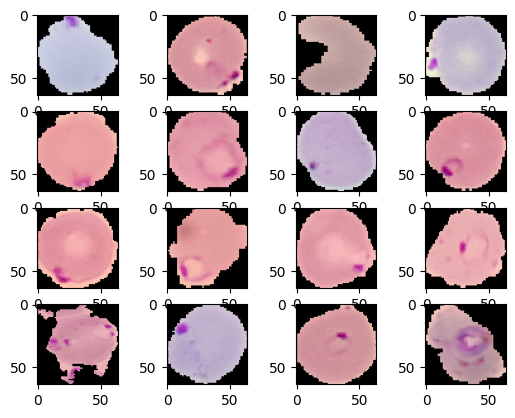

In [ ]:
for i in range(16):
	# define subplot
	pyplot.subplot(4,4,i+1)
 	# plot raw pixel data
	pyplot.imshow(data[i])
# show the figure
pyplot.show()

# Model From Scrath


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout

In [ ]:
model =Sequential ()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',strides=1,activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=48, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 48)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 48)        0

In [ ]:
from keras.optimizers import SGD

In [ ]:
sgd = SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
#Creating Test and train Datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(imageData,imageLabels, test_size=0.20,random_state=42)

In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(22046, 64, 64, 3)
(22046, 2)
(5512, 64, 64, 3)
(5512, 2)


In [ ]:
history=model.fit(x_train, y_train,
          epochs=20,
          validation_data=(x_test, y_test))

Epoch 1/20
689/689 [==============================] - 18s 9ms/step - loss: 0.6944 - accuracy: 0.5161 - val_loss: 0.6882 - val_accuracy: 0.5232
Epoch 2/20
689/689 [==============================] - 6s 9ms/step - loss: 0.6747 - accuracy: 0.5887 - val_loss: 0.6610 - val_accuracy: 0.6477
Epoch 3/20
689/689 [==============================] - 5s 8ms/step - loss: 0.6489 - accuracy: 0.6317 - val_loss: 0.6477 - val_accuracy: 0.6725
Epoch 4/20
689/689 [==============================] - 5s 8ms/step - loss: 0.6224 - accuracy: 0.6753 - val_loss: 0.6090 - val_accuracy: 0.6776
Epoch 5/20
689/689 [==============================] - 6s 9ms/step - loss: 0.5687 - accuracy: 0.7414 - val_loss: 0.5206 - val_accuracy: 0.7622
Epoch 6/20
689/689 [==============================] - 5s 8ms/step - loss: 0.4516 - accuracy: 0.8348 - val_loss: 0.3418 - val_accuracy: 0.8737
Epoch 7/20
689/689 [==============================] - 6s 8ms/step - loss: 0.2992 - accuracy: 0.8987 - val_loss: 0.2385 - val_accuracy: 0.9100
Epoch

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
y_pred = model.predict(x_test)
y_test_classes1 = np.argmax(y_test, axis=1)
y_pred_classes1 = np.argmax(y_pred, axis=1)
confusion = confusion_matrix(y_test_classes1, y_pred_classes1)
accuracy = accuracy_score(y_test_classes1, y_pred_classes1)
precision = precision_score(y_test_classes1, y_pred_classes1)
recall = recall_score(y_test_classes1, y_pred_classes1)
f1 = f1_score(y_test_classes1, y_pred_classes1)

print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

173/173 [==============================] - 11s 4ms/step
Confusion Matrix:
[[   0 2715]
 [   1 2796]]
Accuracy: 0.5072568940493469
Precision: 0.5073489384866631
Recall: 0.9996424740793708
F1-score: 0.6730861819932594


In [ ]:
import matplotlib.pyplot as plt

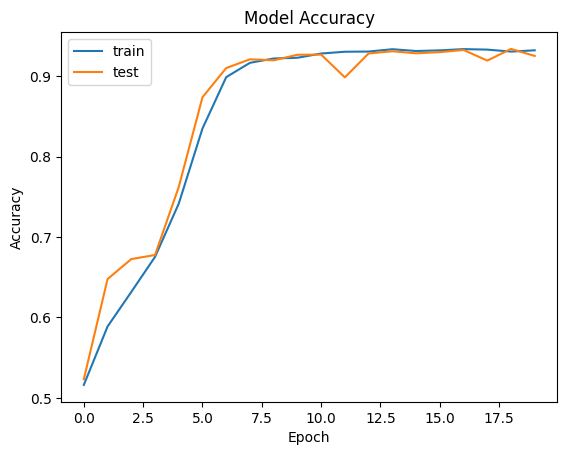

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'

if 'acc' in history.history :
    k = 'acc'

if k != '' :
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

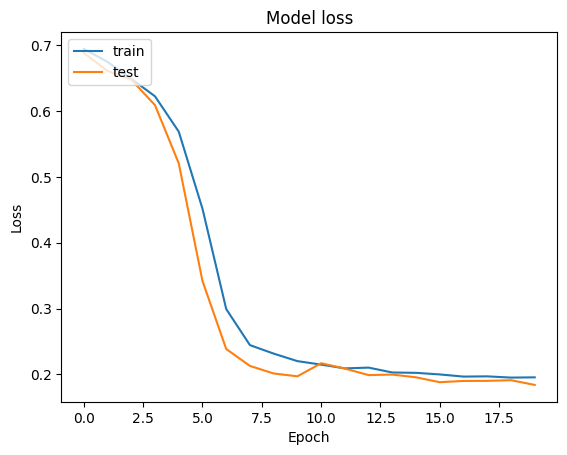

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# pretrained model

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
model2=ResNet50(weights='imagenet',
                    include_top=False,
                    classes=2,
                    input_shape=(64,64,3)# input: 64x64 images with 3 channels -> (64, 64, 3) .
                   )

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
print(model2.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 70, 70, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 32, 32, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
x = model2.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.5)(x)
predictions =Dense(2,activation='sigmoid')(x)

In [ ]:
#creating the final model
ResNet50_model = Model(inputs=model2.input, outputs=predictions)

In [ ]:
ResNet50_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 70, 70, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 32, 32, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
from keras.optimizers import SGD
sgd = SGD(learning_rate=0.0003)

In [ ]:
ResNet50_model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
label = tf.keras.utils.to_categorical(imageLabels, num_classes=2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(imageData, label, test_size=0.20, random_state=42)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(22046, 64, 64, 3)
(22046, 2)
(5512, 64, 64, 3)
(5512, 2)


In [ ]:
history1=ResNet50_model.fit(x_train, y_train,epochs=10, batch_size=16,

          validation_data=(x_test, y_test))

Epoch 1/10
1378/1378 [==============================] - 98s 48ms/step - loss: 0.5105 - accuracy: 0.7867 - val_loss: 0.2616 - val_accuracy: 0.9077
Epoch 2/10
1378/1378 [==============================] - 66s 48ms/step - loss: 0.2751 - accuracy: 0.9062 - val_loss: 0.1792 - val_accuracy: 0.9409
Epoch 3/10
1378/1378 [==============================] - 63s 46ms/step - loss: 0.2174 - accuracy: 0.9260 - val_loss: 0.1527 - val_accuracy: 0.9494
Epoch 4/10
1378/1378 [==============================] - 64s 47ms/step - loss: 0.1885 - accuracy: 0.9378 - val_loss: 0.1393 - val_accuracy: 0.9526
Epoch 5/10
1378/1378 [==============================] - 63s 46ms/step - loss: 0.1649 - accuracy: 0.9456 - val_loss: 0.1337 - val_accuracy: 0.9550
Epoch 6/10
1378/1378 [==============================] - 65s 48ms/step - loss: 0.1500 - accuracy: 0.9496 - val_loss: 0.1279 - val_accuracy: 0.9566
Epoch 7/10
1378/1378 [==============================] - 64s 46ms/step - loss: 0.1432 - accuracy: 0.9515 - val_loss: 0.1240 -

In [ ]:
test_accuracy = ResNet50_model.evaluate(x_test,y_test)
print('Test accuracy:', test_accuracy)

173/173 [==============================] - 3s 15ms/step - loss: 0.1151 - accuracy: 0.9614
Test accuracy: [0.11510544270277023, 0.961357057094574]


In [ ]:
y_pred = ResNet50_model.predict(x_test)
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)
confusion = confusion_matrix(y_test_classes, y_pred_classes)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes)

print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

173/173 [==============================] - 2s 14ms/step
Confusion Matrix:
[[2639   76]
 [ 137 2660]]
Accuracy: 0.9613570391872278
Precision: 0.9722222222222222
Recall: 0.9510189488737933
F1-score: 0.9615037050424724


In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
vgg16_model = VGG16(weights='imagenet',
                    include_top=False,
                    classes='binary',
                    input_shape=(64,64,3)# input: 64x64 images with 3 channels -> (64, 64, 3) .
                   )

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
print(vgg16_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
# Add custom layers on top of the pre-trained base
x = vgg16_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='sigmoid')(x)

In [ ]:
#creating the final model
vgg_model_transfer = Model(inputs=vgg16_model.input, outputs=predictions)

In [ ]:
vgg_model_transfer.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [ ]:
from keras.optimizers import SGD
sgd = SGD(learning_rate=0.0001)

In [ ]:
# Compile the model
vgg_model_transfer.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
label = tf.keras.utils.to_categorical(imageLabels, num_classes=2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(imageData, label, test_size=0.20, random_state=42)

In [ ]:
history2=vgg_model_transfer.fit(x_train, y_train,epochs=15, batch_size=16,

          validation_data=(x_test, y_test))

Epoch 1/15
1378/1378 [==============================] - 58s 39ms/step - loss: 0.4248 - accuracy: 0.8138 - val_loss: 0.2141 - val_accuracy: 0.9198
Epoch 2/15
1378/1378 [==============================] - 51s 37ms/step - loss: 0.1929 - accuracy: 0.9323 - val_loss: 0.1703 - val_accuracy: 0.9421
Epoch 3/15
1378/1378 [==============================] - 51s 37ms/step - loss: 0.1618 - accuracy: 0.9462 - val_loss: 0.1471 - val_accuracy: 0.9472
Epoch 4/15
1378/1378 [==============================] - 55s 40ms/step - loss: 0.1465 - accuracy: 0.9510 - val_loss: 0.1395 - val_accuracy: 0.9516
Epoch 5/15
1378/1378 [==============================] - 53s 39ms/step - loss: 0.1400 - accuracy: 0.9526 - val_loss: 0.1363 - val_accuracy: 0.9523
Epoch 6/15
1378/1378 [==============================] - 51s 37ms/step - loss: 0.1332 - accuracy: 0.9560 - val_loss: 0.1310 - val_accuracy: 0.9541
Epoch 7/15
1378/1378 [==============================] - 51s 37ms/step - loss: 0.1286 - accuracy: 0.9564 - val_loss: 0.1286 -

In [ ]:
test_accuracy = vgg_model_transfer.evaluate(x_test,y_test)
print('Test accuracy:', test_accuracy)

173/173 [==============================] - 4s 19ms/step - loss: 0.7666 - accuracy: 0.5074
Test accuracy: [0.7666442394256592, 0.5074383020401001]


In [ ]:
y_pred = vgg_model_transfer.predict(x_test)
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)
confusion = confusion_matrix(y_test_classes, y_pred_classes)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes)

print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

173/173 [==============================] - 3s 14ms/step
Confusion Matrix:
[[   0 2715]
 [   0 2797]]
Accuracy: 0.5074383164005806
Precision: 0.5074383164005806
Recall: 1.0
F1-score: 0.673245877963654


In [ ]:
from keras.applications.vgg19 import VGG19


In [ ]:
vgg19_model = VGG19(weights='imagenet',
                    include_top=False,
                    classes='binary',
                    input_shape=(64,64,3)# input: 64x64 images with 3 channels -> (64, 64, 3) .
                   )

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# Add custom layers on top of the pre-trained base
x = vgg19_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='sigmoid')(x)

In [ ]:
#creating the final model
vgg19_model_transfer = Model(inputs=vgg19_model.input, outputs=predictions)

In [ ]:
vgg19_model_transfer.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [ ]:
from keras.optimizers import SGD
sgd = SGD(learning_rate=0.0001)

In [ ]:
# Compile the model
vgg19_model_transfer.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
label = tf.keras.utils.to_categorical(imageLabels, num_classes=2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(imageData, label, test_size=0.20, random_state=42)

In [ ]:
history3=vgg19_model_transfer.fit(x_train, y_train,epochs=12, batch_size=16,

          validation_data=(x_test, y_test))

Epoch 1/12
1378/1378 [==============================] - 69s 47ms/step - loss: 0.4086 - accuracy: 0.8196 - val_loss: 0.1848 - val_accuracy: 0.9343
Epoch 2/12
1378/1378 [==============================] - 63s 46ms/step - loss: 0.1739 - accuracy: 0.9433 - val_loss: 0.1480 - val_accuracy: 0.9492
Epoch 3/12
1378/1378 [==============================] - 64s 46ms/step - loss: 0.1495 - accuracy: 0.9525 - val_loss: 0.1429 - val_accuracy: 0.9508
Epoch 4/12
1378/1378 [==============================] - 64s 46ms/step - loss: 0.1403 - accuracy: 0.9547 - val_loss: 0.1348 - val_accuracy: 0.9541
Epoch 5/12
1378/1378 [==============================] - 63s 46ms/step - loss: 0.1337 - accuracy: 0.9569 - val_loss: 0.1329 - val_accuracy: 0.9539
Epoch 6/12
1378/1378 [==============================] - 64s 46ms/step - loss: 0.1306 - accuracy: 0.9582 - val_loss: 0.1273 - val_accuracy: 0.9552
Epoch 7/12
1378/1378 [==============================] - 63s 45ms/step - loss: 0.1255 - accuracy: 0.9595 - val_loss: 0.1272 -

In [ ]:
test_accuracy3 = vgg19_model_transfer.evaluate(x_test,y_test)
print('Test accuracy:', test_accuracy3)

173/173 [==============================] - 3s 18ms/step - loss: 0.1211 - accuracy: 0.9565
Test accuracy: [0.121124267578125, 0.9564586281776428]


In [ ]:
y_pred = vgg19_model_transfer.predict(x_test)
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)
confusion = confusion_matrix(y_test_classes, y_pred_classes)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes)

print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

173/173 [==============================] - 3s 17ms/step
Confusion Matrix:
[[2657   58]
 [ 182 2615]]
Accuracy: 0.9564586357039188
Precision: 0.9783015338570894
Recall: 0.9349302824454773
F1-score: 0.9561243144424132
